In [1]:
import pandas as pd
import numpy as np

In [3]:
df=pd.read_csv('../data/train.csv')

In [4]:
df.head()


,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [5]:
df.shape

(891, 12)

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [7]:
df.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [8]:
df.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [9]:
df["Age"].fillna(df['Age'].median(),inplace=True)

C:\Users\91730\AppData\Local\Temp\ipykernel_3636\669304487.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df["Age"].fillna(df['Age'].median(),inplace=True)


In [10]:
df.drop(columns='Cabin',inplace=True)

In [12]:
df['Embarked'].unique()

array(['S', 'C', 'Q', nan], dtype=object)

In [14]:
df['Embarked'].fillna(df['Embarked'].mode()[0],inplace=True)

In [15]:
df.isnull().sum()

PassengerId    0
Survived       0
Pclass         0
Name           0
Sex            0
Age            0
SibSp          0
Parch          0
Ticket         0
Fare           0
Embarked       0
dtype: int64

In [16]:
df['Sex'].unique()

array(['male', 'female'], dtype=object)

In [17]:
df['Sex']=df['Sex'].map({'male':0,'female':1})

In [18]:
df['Embarked']=df['Embarked'].astype('category').cat.codes

In [19]:
df['Embarked'].head()

0    2
1    0
2    2
3    2
4    2
Name: Embarked, dtype: int8

In [20]:
df['Embarked'].unique()

array([2, 0, 1], dtype=int8)

In [21]:
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",0,22.0,1,0,A/5 21171,7.2500,2
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",1,38.0,1,0,PC 17599,71.2833,0
2,3,1,3,"Heikkinen, Miss. Laina",1,26.0,0,0,STON/O2. 3101282,7.9250,2
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",1,35.0,1,0,113803,53.1000,2
4,5,0,3,"Allen, Mr. William Henry",0,35.0,0,0,373450,8.0500,2


In [22]:
df["Title"]=df['Name'].str.extract(' ([A-Za-z]+)\.',expand=False)

<>:1: SyntaxWarning: invalid escape sequence '\.'
<>:1: SyntaxWarning: invalid escape sequence '\.'
C:\Users\91730\AppData\Local\Temp\ipykernel_3636\1038062976.py:1: SyntaxWarning: invalid escape sequence '\.'
  df["Title"]=df['Name'].str.extract(' ([A-Za-z]+)\.',expand=False)


In [23]:
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked,Title
0,1,0,3,"Braund, Mr. Owen Harris",0,22.0,1,0,A/5 21171,7.2500,2,Mr
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",1,38.0,1,0,PC 17599,71.2833,0,Mrs
2,3,1,3,"Heikkinen, Miss. Laina",1,26.0,0,0,STON/O2. 3101282,7.9250,2,Miss
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",1,35.0,1,0,113803,53.1000,2,Mrs
4,5,0,3,"Allen, Mr. William Henry",0,35.0,0,0,373450,8.0500,2,Mr


In [24]:
df['Title'].unique()

array(['Mr', 'Mrs', 'Miss', 'Master', 'Don', 'Rev', 'Dr', 'Mme', 'Ms',
       'Major', 'Lady', 'Sir', 'Mlle', 'Col', 'Capt', 'Countess',
       'Jonkheer'], dtype=object)

In [25]:
df['Title']=df['Title'].astype('category').cat.codes

In [26]:
df['Title'].unique()

array([12, 13,  9,  8,  3, 15,  4, 11, 14,  7,  6, 16, 10,  1,  0,  2,  5],
      dtype=int8)

In [27]:
df['Familysize']=df['SibSp']+df['Parch']+1

In [28]:
df['Familysize']

0      2
1      2
2      1
3      2
4      1
      ..
886    1
887    1
888    4
889    1
890    1
Name: Familysize, Length: 891, dtype: int64

In [29]:
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked,Title,Familysize
0,1,0,3,"Braund, Mr. Owen Harris",0,22.0,1,0,A/5 21171,7.2500,2,12,2
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",1,38.0,1,0,PC 17599,71.2833,0,13,2
2,3,1,3,"Heikkinen, Miss. Laina",1,26.0,0,0,STON/O2. 3101282,7.9250,2,9,1
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",1,35.0,1,0,113803,53.1000,2,13,2
4,5,0,3,"Allen, Mr. William Henry",0,35.0,0,0,373450,8.0500,2,12,1


In [30]:
df['Title'].value_counts()

Title
12    517
9     182
13    125
8      40
4       7
15      6
1       2
10      2
7       2
14      1
11      1
3       1
6       1
16      1
0       1
2       1
5       1
Name: count, dtype: int64

In [31]:
df["Title"] = df['Name'].str.extract(' ([A-Za-z]+)\.', expand=False)

<>:1: SyntaxWarning: invalid escape sequence '\.'
<>:1: SyntaxWarning: invalid escape sequence '\.'
C:\Users\91730\AppData\Local\Temp\ipykernel_3636\4064560362.py:1: SyntaxWarning: invalid escape sequence '\.'
  df["Title"] = df['Name'].str.extract(' ([A-Za-z]+)\.', expand=False)


In [32]:
df['Title'].value_counts()

Title
Mr          517
Miss        182
Mrs         125
Master       40
Dr            7
Rev           6
Col           2
Mlle          2
Major         2
Ms            1
Mme           1
Don           1
Lady          1
Sir           1
Capt          1
Countess      1
Jonkheer      1
Name: count, dtype: int64

In [33]:
df['Title']=df['Title'].replace({'Mlle':'Miss','Ms':'Miss','Mme':'Mrs'})

In [34]:
df['Title'].value_counts()

Title
Mr          517
Miss        185
Mrs         126
Master       40
Dr            7
Rev           6
Col           2
Major         2
Don           1
Lady          1
Sir           1
Capt          1
Countess      1
Jonkheer      1
Name: count, dtype: int64

In [35]:
rare_titles = ['Lady', 'Countess', 'Capt', 'Col', 'Don', 'Dr', 'Major', 
               'Rev', 'Sir', 'Jonkheer', 'Dona']
df['Title']=df['Title'].replace(rare_titles,'Rare')

In [36]:
df['Title'].value_counts()

Title
Mr        517
Miss      185
Mrs       126
Master     40
Rare       23
Name: count, dtype: int64

In [37]:
df["Title"] = df["Title"].astype("category").cat.codes

In [38]:
df['Title'].unique()

array([2, 3, 1, 0, 4], dtype=int8)

In [39]:
df.drop(['Name','Ticket'],axis=1,inplace=True)

In [40]:
df.head()

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked,Title,Familysize
0,1,0,3,0,22.0,1,0,7.2500,2,2,2
1,2,1,1,1,38.0,1,0,71.2833,0,3,2
2,3,1,3,1,26.0,0,0,7.9250,2,1,1
3,4,1,1,1,35.0,1,0,53.1000,2,3,2
4,5,0,3,0,35.0,0,0,8.0500,2,2,1


In [41]:
df = df.drop_duplicates()

In [42]:
df.head()

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked,Title,Familysize
0,1,0,3,0,22.0,1,0,7.2500,2,2,2
1,2,1,1,1,38.0,1,0,71.2833,0,3,2
2,3,1,3,1,26.0,0,0,7.9250,2,1,1
3,4,1,1,1,35.0,1,0,53.1000,2,3,2
4,5,0,3,0,35.0,0,0,8.0500,2,2,1


In [45]:
import os
print(os.getcwd())


c:\Users\91730\titanic-data-analysis\notebooks


In [46]:
df.to_csv('../outputs/cleaned_train.csv', index=False)


In [ ]:
import os
print(os.path.exists('../outputs/cleaned_train.csv')) 


True


EDA

In [4]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Load cleaned data
df = pd.read_csv('../outputs/cleaned_train.csv')

# Show basic info
df.info()

# Preview data
df.head()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Sex          891 non-null    int64  
 4   Age          891 non-null    float64
 5   SibSp        891 non-null    int64  
 6   Parch        891 non-null    int64  
 7   Fare         891 non-null    float64
 8   Embarked     891 non-null    int64  
 9   Title        891 non-null    int64  
 10  Familysize   891 non-null    int64  
dtypes: float64(2), int64(9)
memory usage: 76.7 KB


,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked,Title,Familysize
0,1,0,3,0,22.0,1,0,7.2500,2,2,2
1,2,1,1,1,38.0,1,0,71.2833,0,3,2
2,3,1,3,1,26.0,0,0,7.9250,2,1,1
3,4,1,1,1,35.0,1,0,53.1000,2,3,2
4,5,0,3,0,35.0,0,0,8.0500,2,2,1


In [5]:
# Summary stats
df.describe(include='all')

# Check for missing values
df.isnull().sum()


PassengerId    0
Survived       0
Pclass         0
Sex            0
Age            0
SibSp          0
Parch          0
Fare           0
Embarked       0
Title          0
Familysize     0
dtype: int64

In [6]:
df['Survived'].value_counts()

Survived
0    549
1    342
Name: count, dtype: int64

In [7]:
df['Survived'].value_counts(normalize=True)

Survived
0    0.616162
1    0.383838
Name: proportion, dtype: float64

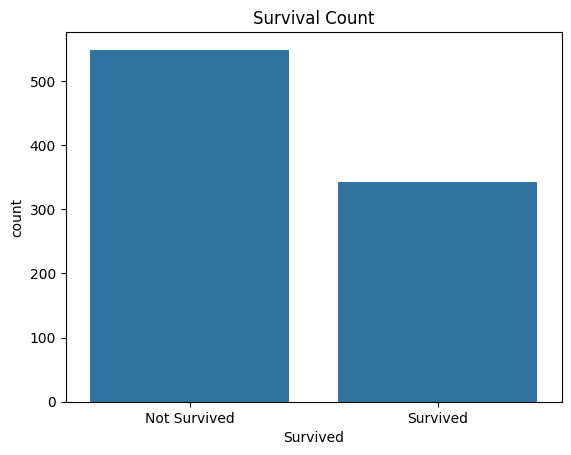

In [8]:
sns.countplot(data=df, x='Survived')
plt.title('Survival Count')
plt.xticks([0, 1], ['Not Survived', 'Survived'])
plt.show()

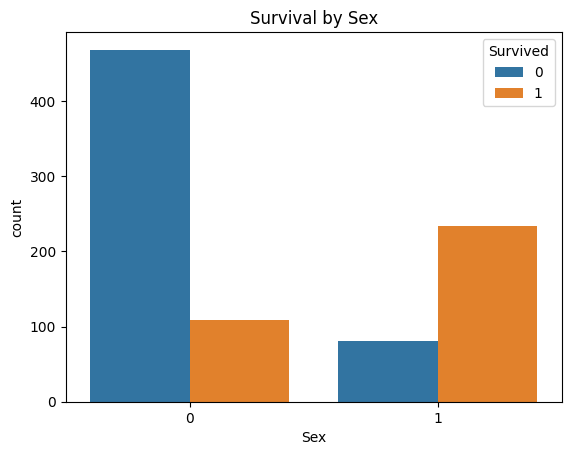

In [9]:
sns.countplot(data=df, x='Sex', hue='Survived')
plt.title('Survival by Sex')
plt.show()


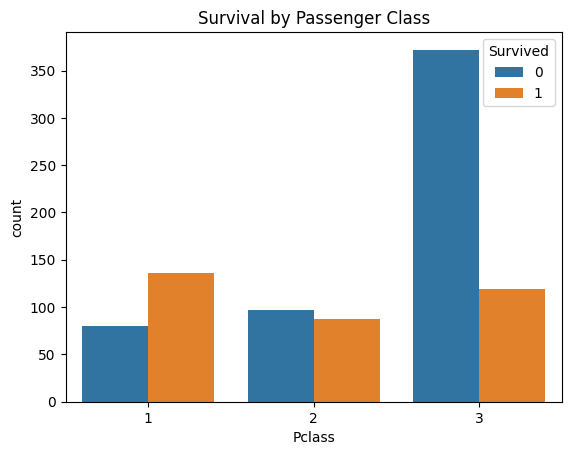

In [10]:
sns.countplot(data=df, x='Pclass', hue='Survived')
plt.title('Survival by Passenger Class')
plt.show()


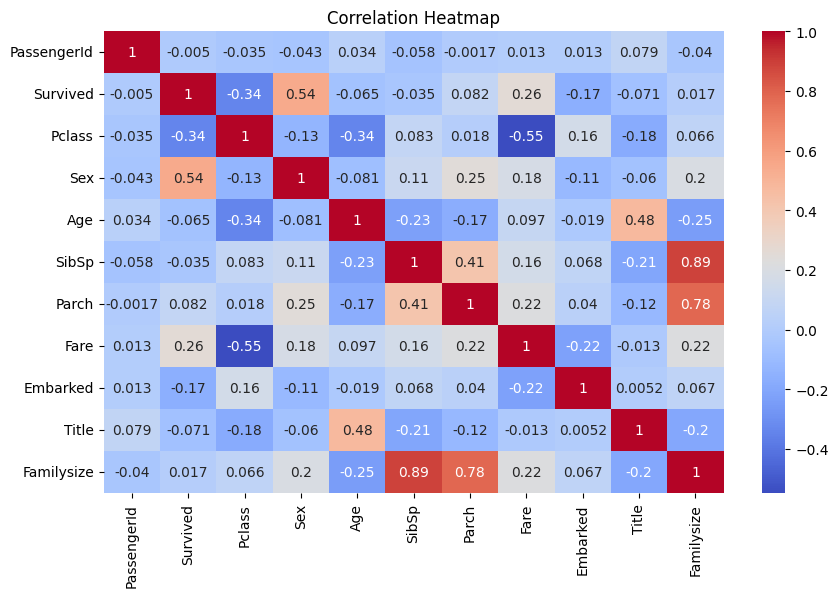

In [11]:
plt.figure(figsize=(10, 6))
sns.heatmap(df.corr(numeric_only=True), annot=True, cmap='coolwarm')
plt.title('Correlation Heatmap')
plt.show()
